In [7]:
# Imports
from utils.analysis.tools import simDir
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import pandas as pd
import seaborn as sns
from utils.plot import _FIGURE_DIR, get_size_inches, _CM

In [2]:
root = (Path("/nfs/arupclab001/davidgoh/")
    / "CoupledEPCondensates/workspace/"
    / "01_Flow/20231120_FlowPhaseDiagramHighRes")

In [3]:
sweep_directory = Path(root)
sweep_file = sweep_directory / "sweep_parameters.txt"
sweep_parameters = [line.split(",")[0] for line in sweep_file.read_text().splitlines()]

In [4]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]

In [5]:
col = sweep_parameters + ["n_condensate", "max_eccentricity", "max_variance", "mean"]

In [8]:
def worker(worker_input):
    simdir_path = worker_input
    sd = simDir(simdir_path)
    val = []
    sd.run()
    sd.condensate()
    val.append(sd.params['k_production'])
    val.append(sd.params['initial_values'][0])
    
    try:
        val.append(sd.n_condensate().max())
        # If the condensate renucleates, there will be 2 droplets
        # We use .max() to grab the 2 from the timeseries (initially 1 droplet)
    except:
        # NOTE: DBSCAN will return error if there's no condensate
        val.append(0) # This indicates the condensate dissolves

    if val[2] == 1:
        val.append(sd.eccentricity.max())
        val.append(np.var(sd.radius,axis=1).max())
        val.append(np.mean(sd.radius))
    else:
        val += [np.nan, np.nan, np.nan]
    
    return val

In [9]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]
processes = mp.Pool(40-1)
results = processes.map(worker,simdir_paths)

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\



In [33]:
df = pd.DataFrame(results)
df.columns = col
pivot = df.pivot_table(index="initial_values",columns="k_production",values=["max_eccentricity","max_variance","mean", "n_condensate"])

In [45]:
# pivot.to_pickle("20240406_pivot.pkl")
pivot = pd.read_pickle("20240406_pivot.pkl")

In [46]:
pivot = pivot.sort_index()

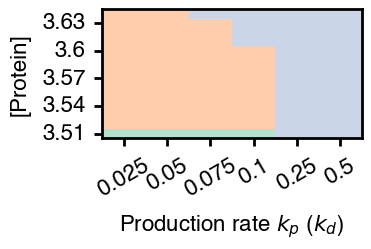

In [49]:
variable = "n_condensate"
cbarlabel = variable
fig, ax = plt.subplots()
fig.set_size_inches(8.5/2*_CM,8.5*_CM/4)
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': ""},
                cmap=sns.color_palette([sns.color_palette("Pastel2")[0], sns.color_palette("Pastel2")[1],sns.color_palette("Pastel2")[2]]),
                vmin=0,vmax=2)
colorbar = ax.collections[0].colorbar 

ax.invert_yaxis()
ax.set_xlabel("Production rate $k_p$ ($k_d$)")
ax.set_ylabel("[Protein]")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
# ax.yaxis.set_label_coords(-0.25,0.4)
# n = 3
# r = colorbar.vmax - colorbar.vmin 
# colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
# colorbar.set_ticklabels(["Flow", "Nucleation", "Dissolution"],
#                         va="center")
# ax.locator_params(axis='y', nbins=8)
# ax.locator_params(axis='x', nbins=6)
ax.tick_params(axis='x', labelrotation=30)
colorbar.remove()
plt.savefig(_FIGURE_DIR / "Fig1_B_PhaseDiagram")  

In [50]:
df = pivot[variable]

In [51]:
df.loc[3.52,0.075] = np.nan
df.loc[3.58,0.075] = np.nan
df.loc[3.56,0.25] = np.nan
df.loc[3.51,0.025] = np.nan

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[3.52,0.075] = np.nan

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[3.58,0.075] = np.nan

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[3.56,0.25] = np.nan

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[3.51,0.025] = np.nan



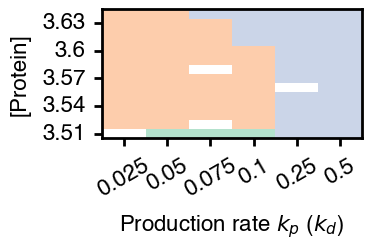

In [53]:
variable = "n_condensate"
cbarlabel = variable
fig, ax = plt.subplots()
fig.set_size_inches(8.5/2*_CM,8.5*_CM/4)
g = sns.heatmap(df, ax = ax,
                cbar_kws={'label': ""},
                cmap=sns.color_palette([sns.color_palette("Pastel2")[0], sns.color_palette("Pastel2")[1],sns.color_palette("Pastel2")[2]]),
                vmin=0,vmax=2)
colorbar = ax.collections[0].colorbar 

ax.invert_yaxis()
ax.set_xlabel("Production rate $k_p$ ($k_d$)")
ax.set_ylabel("[Protein]")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
# ax.yaxis.set_label_coords(-0.25,0.4)
# n = 3
# r = colorbar.vmax - colorbar.vmin 
# colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
# colorbar.set_ticklabels(["Flow", "Nucleation", "Dissolution"],
#                         va="center")
# ax.locator_params(axis='y', nbins=8)
# ax.locator_params(axis='x', nbins=6)
ax.tick_params(axis='x', labelrotation=30)
colorbar.remove()
plt.savefig(_FIGURE_DIR / "Fig1_B_PhaseDiagram_Pos")  

In [55]:
df = pd.DataFrame(results)
df.columns = col
pivot = df.pivot_table(index="initial_values",columns="k_production",values=["max_eccentricity","max_variance","mean", "n_condensate"])

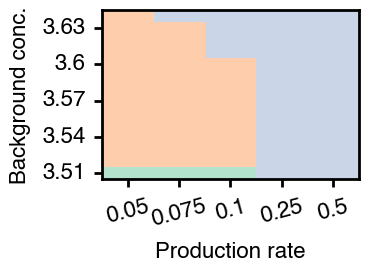

In [56]:
variable = "n_condensate"
cbarlabel = variable
fig, ax = plt.subplots()
fig.set_size_inches(8.4/2*_CM,8.4*_CM/2*2/3)
g = sns.heatmap(pivot[variable][pivot[variable].columns[1:]], ax = ax,
                cbar_kws={'label': ""},
                cmap=sns.color_palette([sns.color_palette("Pastel2")[0], sns.color_palette("Pastel2")[1],sns.color_palette("Pastel2")[2]]),
                vmin=0,vmax=2)
colorbar = ax.collections[0].colorbar 

ax.invert_yaxis()
ax.set_xlabel("Production rate")
ax.set_ylabel("Background conc.")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
# ax.yaxis.set_label_coords(-0.25,0.4)
# n = 3
# r = colorbar.vmax - colorbar.vmin 
# colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
# colorbar.set_ticklabels(["Flow", "Nucleation", "Dissolution"],
#                         va="center")
# ax.locator_params(axis='y', nbins=8)
# ax.locator_params(axis='x', nbins=6)
ax.tick_params(axis='x', labelrotation=15)
# ax.tick_params(axis='y', labelrotation=0)
colorbar.remove()
plt.savefig(_FIGURE_DIR / "Fig1_B_PhaseDiagramAlternative")  

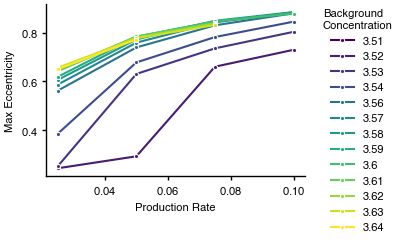

In [14]:
variable = "max_eccentricity"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Max Eccentricity")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

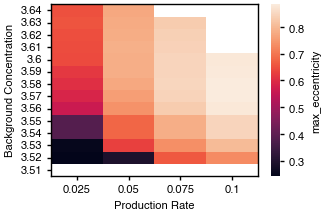

In [15]:
variable = "max_eccentricity"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "max_eccentricity"})
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

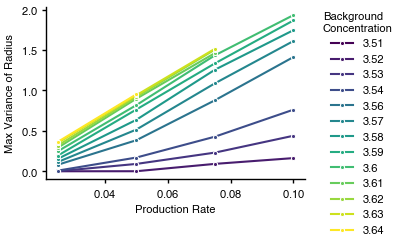

In [16]:
variable = "max_variance"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Max Variance of Radius")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

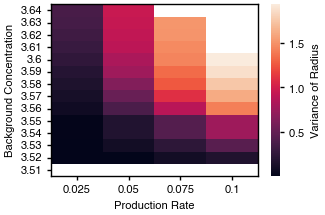

In [17]:
variable = "max_variance"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "Variance of Radius"})
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

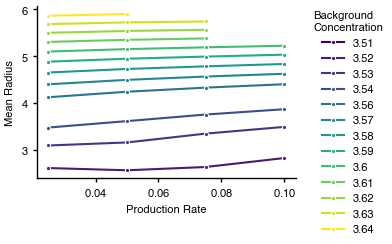

In [18]:
variable = "mean"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.lineplot(df, x = "k_production", y=variable, ax = ax, hue = "initial_values",
                 palette="viridis", marker="o", legend="full")
ax.set_xlabel("Production Rate")
ax.set_ylabel("Mean Radius")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Background\nConcentration")

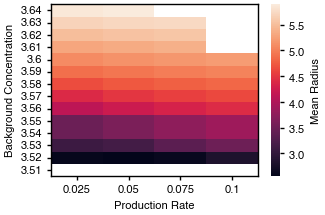

In [19]:
variable = "mean"
cbarlabel = variable
fig, ax = plt.subplots()
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': "Mean Radius"},
                cmap="rocket")
ax.invert_yaxis()
ax.set_xlabel("Production Rate")
ax.set_ylabel("Background Concentration")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)